Question: What is the relationship between movie runtime and ratings?

In [1]:
from module1_util_scripts.sqlreader import SQLReader
from module1_util_scripts.grapher import Grapher
import pandas as pd

In [2]:
def generate_df():

    query = """
            SELECT *
            FROM derived_ratings_df
            WHERE genres in ('Biography', 'Animation', 'Sci-Fi')
            """
    db = 'movies_db.sqlite'
    df = SQLReader.read(query, db)
    return df

In [3]:
def plot_regression(df):
    
    #plot scatterplot of movie runtime and weighted average rating
    #perform linear regression and display linear equation
    df = df.loc[df['runtime_minutes'].notnull() & df['weighted_average_rating'].notnull()].copy()
    for genre in df['genres'].unique():

        title = f'{genre} Movie Runtime vs Ratings Linear Regression'
        plot_df = df.loc[df['genres'] == genre].copy()
        plot_df.index = plot_df['runtime_minutes']
        plot_df = plot_df[['weighted_average_rating']]
        Grapher.plot_scatter('Runtime (minutes)', 'Rating', title, plot_df, ymin=0, ymax=10)

In [4]:
df = generate_df()

Processing SQL Query with SQLReader
Connecting to movies_db.sqlite with SQLReader
Sucessfully fetched query results with SQLReader
Closed connection to movies_db.sqlite with SQLReader


From the below regression plots, we can infer that there is little to no relationship between movie runtime and ratings for all the top 3 genres.

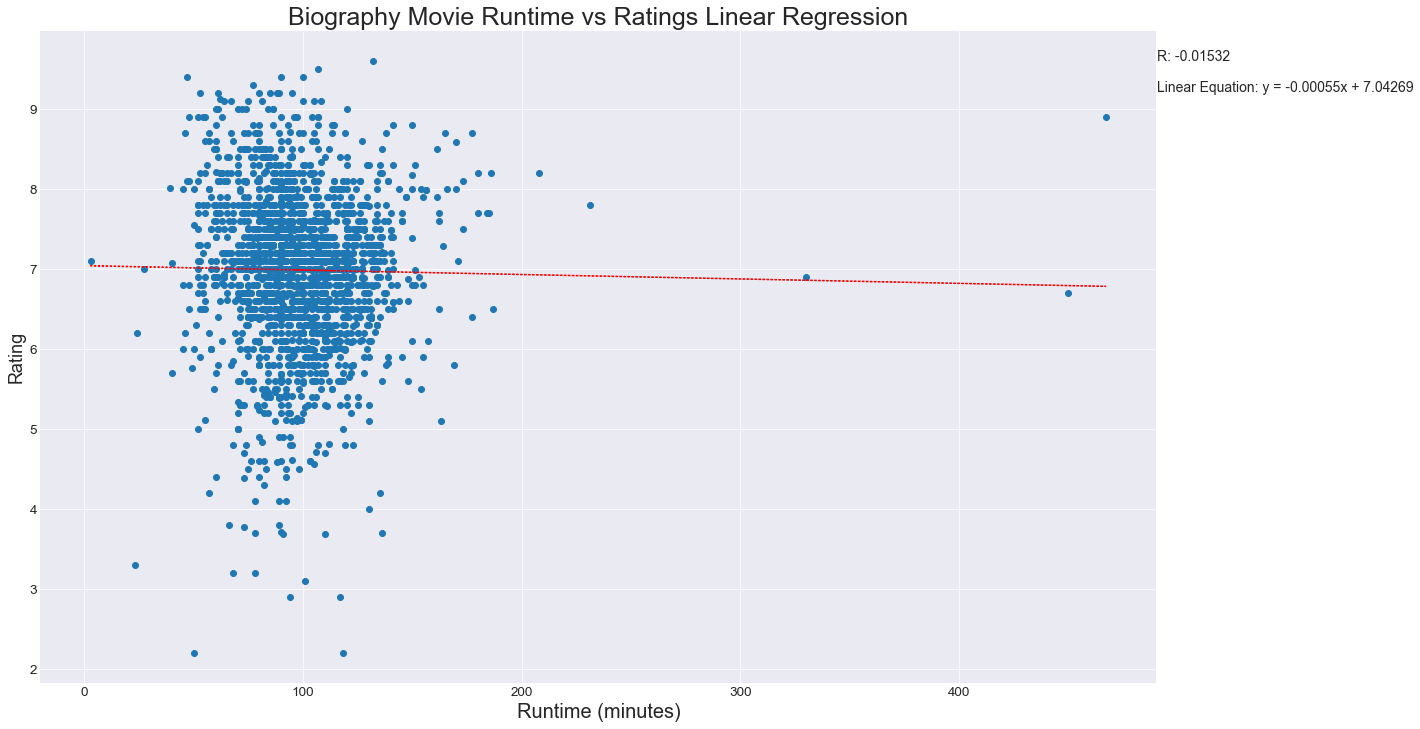

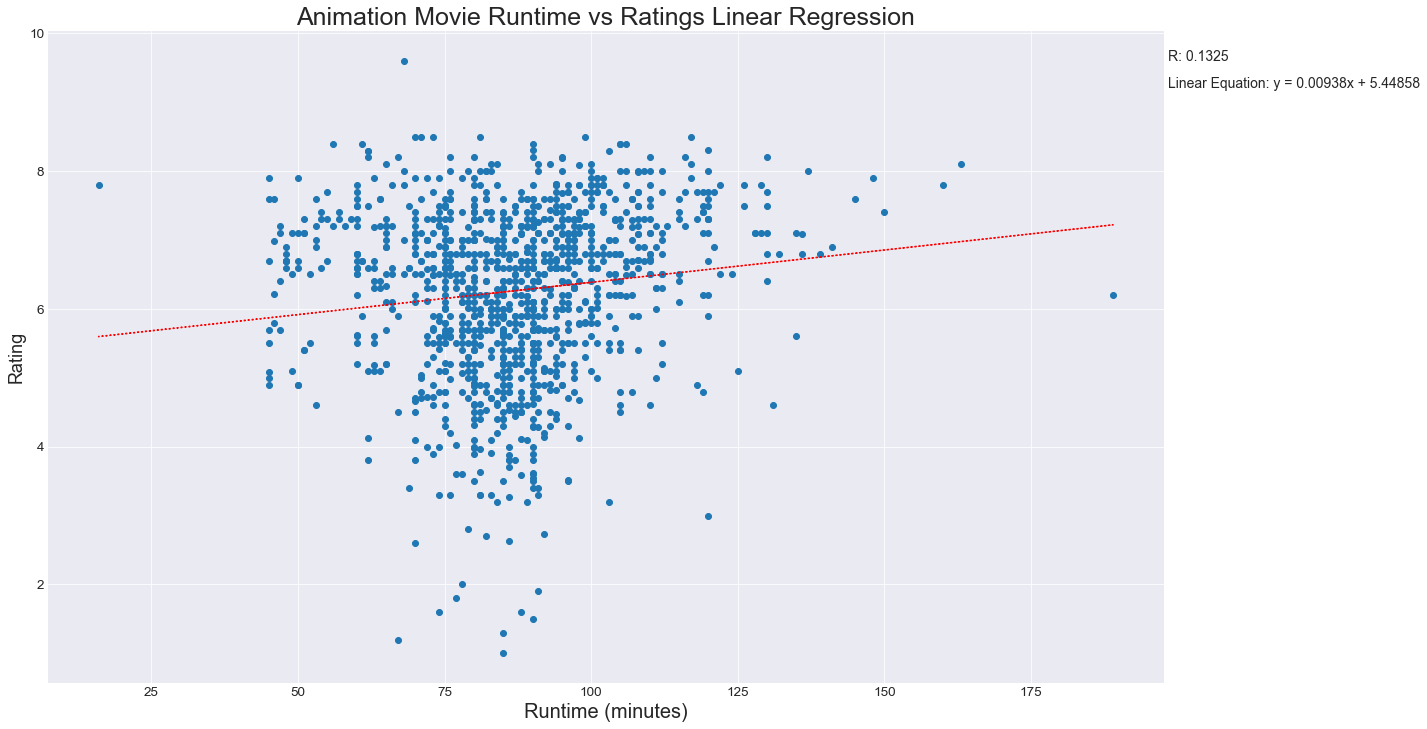

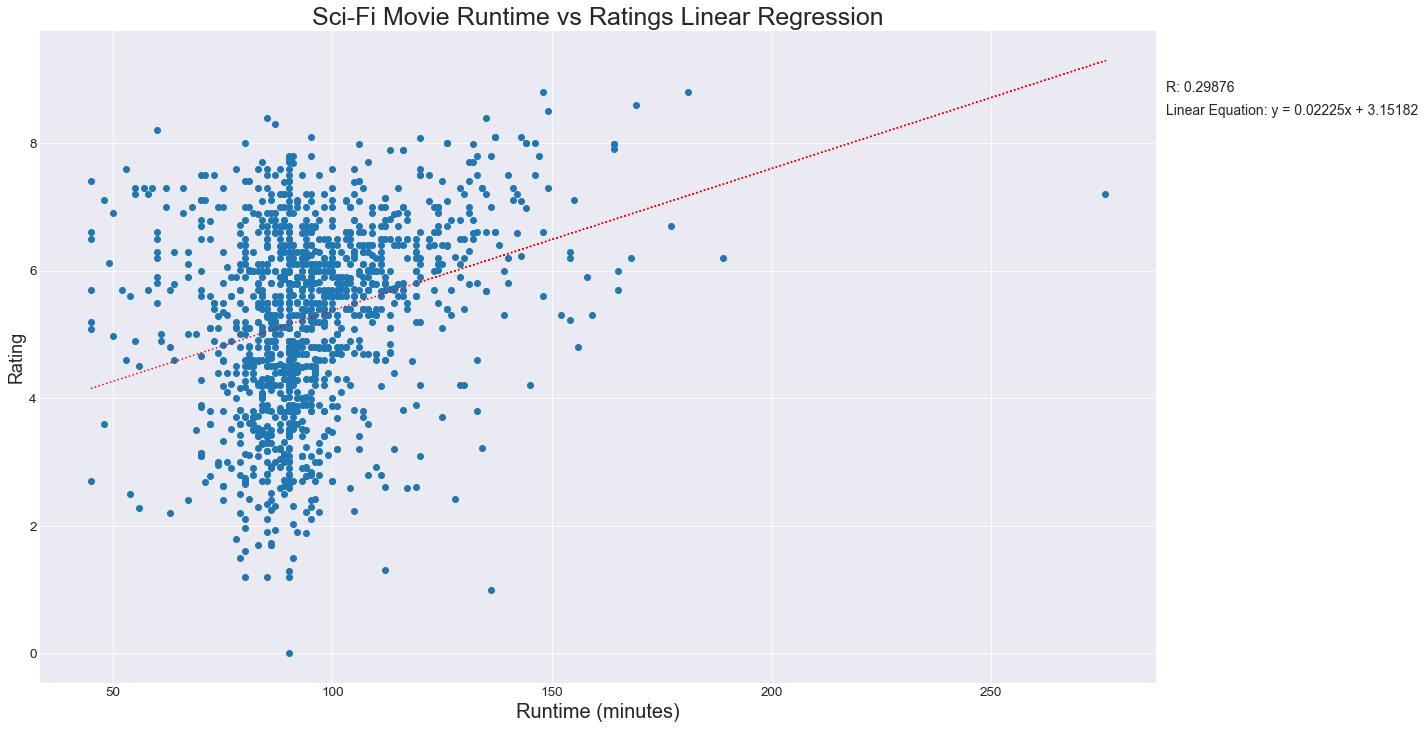

In [5]:
plot_regression(df)